### Importing necessary libraries and reading the file

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\abalone.csv.txt")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Standardisation is not necessary, since all the data is in same range between 0 and 1 except the target

### Exploratory Data Analysis

In [3]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [4]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

No null values present

In [5]:
data.shape

(4177, 9)

In [6]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Since sex is the only categorical variable, convert to integer

In [7]:
data['Sex'].replace(['F','M','I'],[0,1,2],inplace=True)
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.008379,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.796410,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
data.columns = ["Sex","Length","Diameter","Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"]
data.head(2)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


### Data Visualisation for normal distribution and outliers detection

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<function matplotlib.pyplot.show(close=None, block=None)>

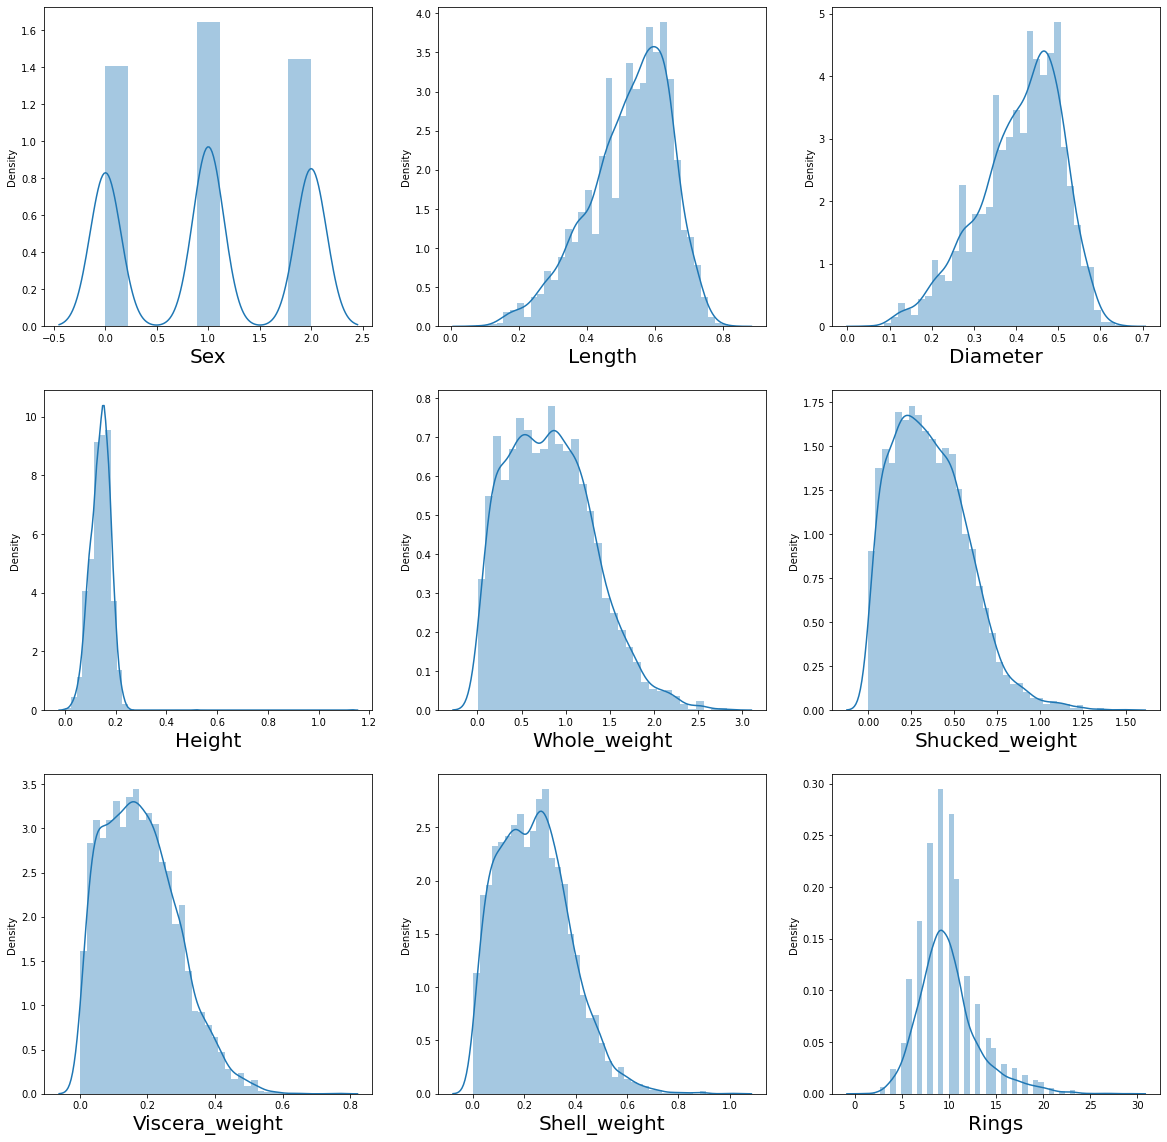

In [11]:
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=9:
        ax =  plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

Data distribution looks decent but there are outliers. So, check for outliers after checcking correlation

### Check for correlation

<function matplotlib.pyplot.show(close=None, block=None)>

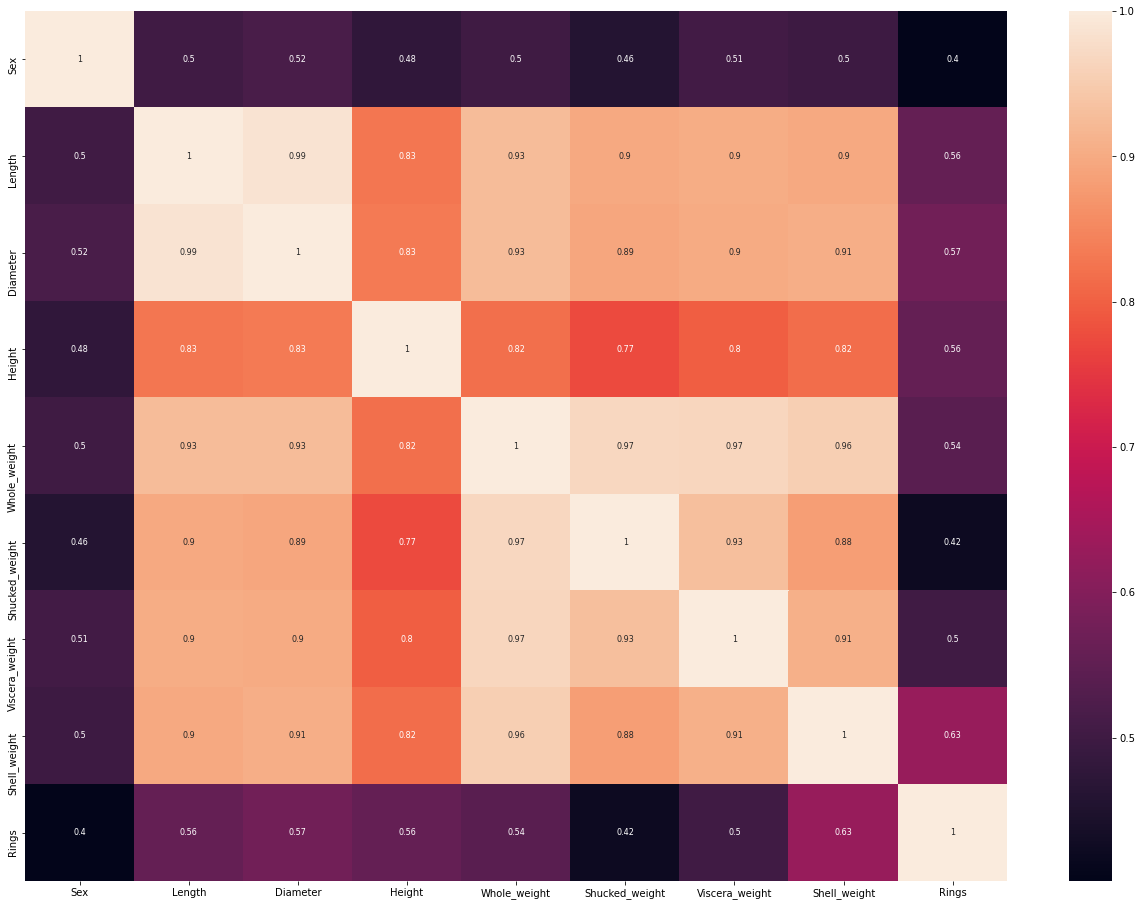

In [12]:
data_corr = data.corr().abs()
plt.figure (figsize = (22,16))
sns.heatmap(data_corr,annot = True, annot_kws = {'size':8}) 
plt.show

- Length and diameter are correlated - remove length
- whole weight is correlated with shucked weight(0.97), viscera weight(0.97) and shell weight(0.95) - remove shucked weight and viscera weight

### Double check for correlation

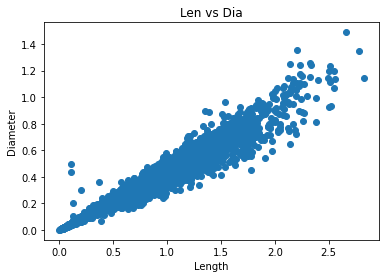

In [13]:
# length vs diameter
plt.scatter(data.Whole_weight, data.Shucked_weight)
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title ('Len vs Dia')
plt.show()

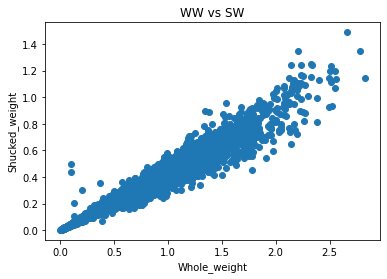

In [14]:
#whole_weight vs Shucked_weight
plt.scatter(data.Whole_weight, data.Shucked_weight)
plt.xlabel('Whole_weight')
plt.ylabel('Shucked_weight')
plt.title ('WW vs SW')
plt.show()

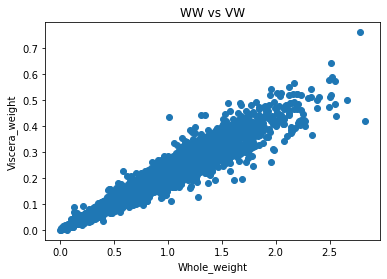

In [15]:
#whole_weight vs viscera_weight
plt.scatter(data.Whole_weight, data.Viscera_weight)
plt.xlabel('Whole_weight')
plt.ylabel('Viscera_weight')
plt.title ('WW vs VW')
plt.show()

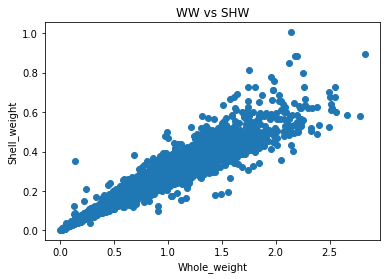

In [16]:
#whole_weight vs Shell_weight
plt.scatter(data.Whole_weight, data.Shell_weight)
plt.xlabel('Whole_weight')
plt.ylabel('Shell_weight')
plt.title ('WW vs SHW')
plt.show()

Yes, all are correlated. So, remove length, shucked weight, viscera weight and shell weight to avoid multicollinearity problem

In [17]:
data = data.drop(columns = ['Length','Shucked_weight','Viscera_weight','Shell_weight'])
data.head(2)

,Sex,Diameter,Height,Whole_weight,Rings
0,1,0.365,0.095,0.5140,15
1,1,0.265,0.090,0.2255,7


### Checking outliers

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\li

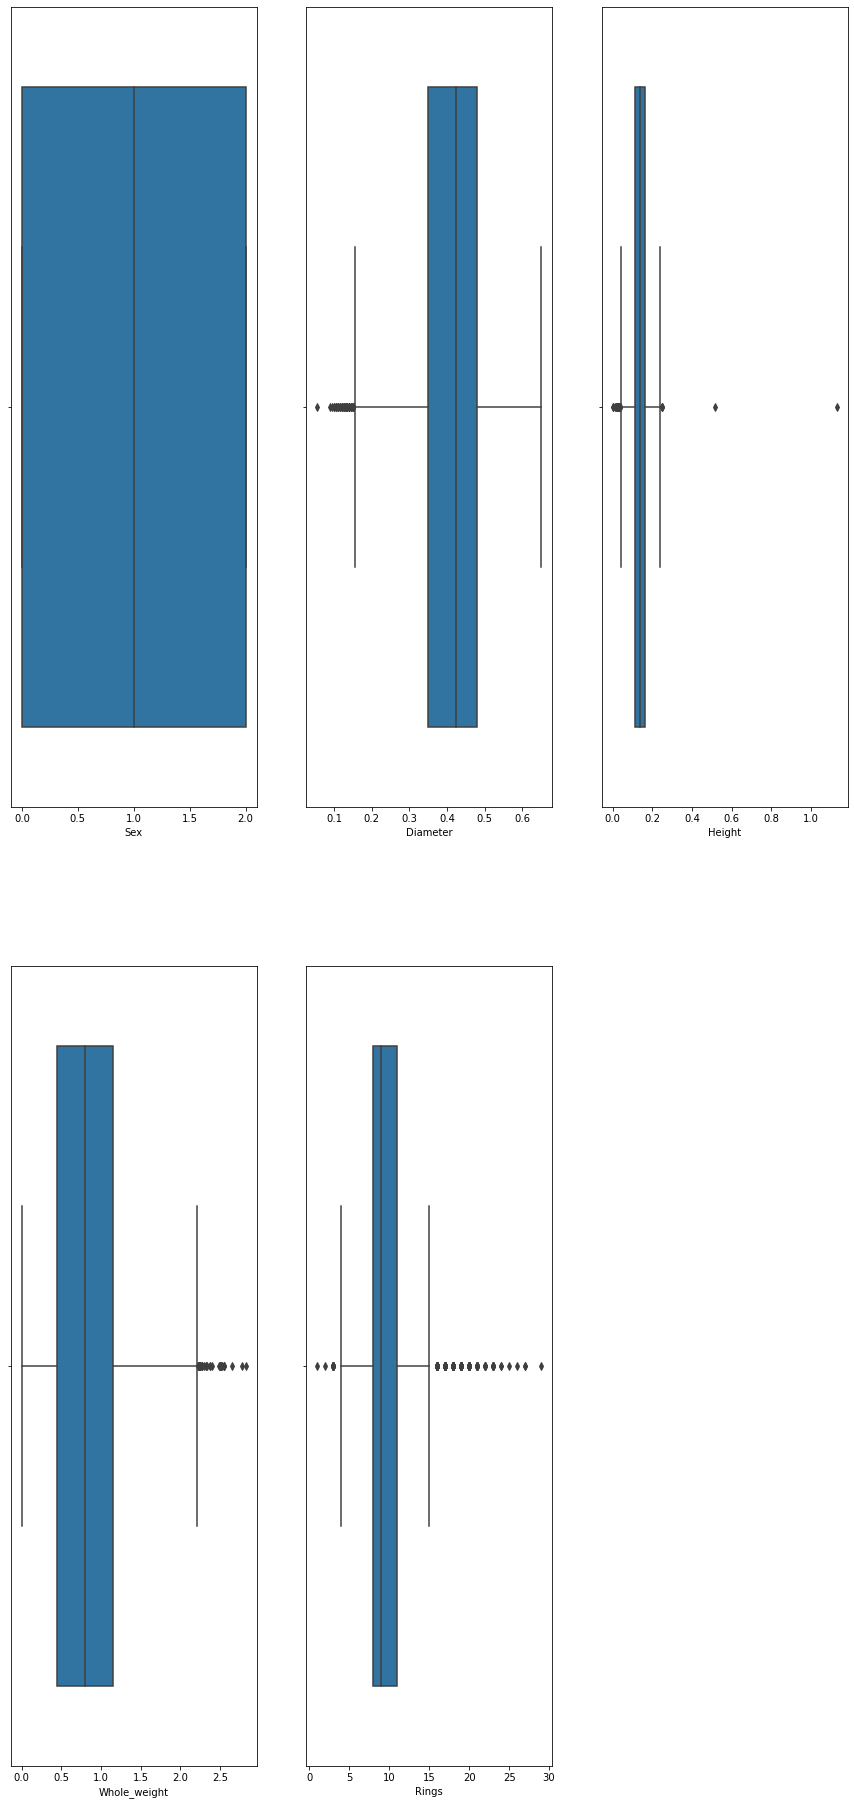

In [18]:
plt.figure(figsize=(15,50))
graph = 1
for column in data:
    if graph<=9:
        ax = plt.subplot(3,3,graph)
        sns.boxplot(data[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

There is outliers in length, diameter, height, whole weight, shucked weight, viscera weight,shell weight,rings

### Treating outliers

In [20]:
#Find the IQR (Inter Quartile Range)
q1 = data.quantile(0.25)
q3 = data.quantile (0.75)
#IQR
iqr = q3 - q1

Outliers to be treated
- Length and diameter = Lower side
- Height, rings = Both
- Whole weight,shucked weight, viscera weight, shell weight = Higher side

In [21]:
dia_low = (q1.Diameter - (1.5 * iqr.Diameter))
print (dia_low)

dia_out = np.where (data['Diameter']<dia_low)

data = data.drop(data.index[dia_out])
print (data.shape)

data.reset_index()

0.15499999999999997
(4118, 5)


,index,Sex,Diameter,Height,Whole_weight,Rings
0,0,1,0.365,0.095,0.5140,15
1,1,1,0.265,0.090,0.2255,7
2,2,0,0.420,0.135,0.6770,9
3,3,1,0.365,0.125,0.5160,10
4,4,2,0.255,0.080,0.2050,7
...,...,...,...,...,...,...
4113,4172,0,0.450,0.165,0.8870,11
4114,4173,1,0.440,0.135,0.9660,10
4115,4174,1,0.475,0.205,1.1760,9
4116,4175,0,0.485,0.150,1.0945,10


In [22]:
he_low = (q1.Height - (1.5 * iqr.Height))
print (he_low)

he_out = np.where (data['Height']<he_low)

data = data.drop(data.index[he_out])
print (data.shape)

data.reset_index()

0.039999999999999994
(4115, 5)


,index,Sex,Diameter,Height,Whole_weight,Rings
0,0,1,0.365,0.095,0.5140,15
1,1,1,0.265,0.090,0.2255,7
2,2,0,0.420,0.135,0.6770,9
3,3,1,0.365,0.125,0.5160,10
4,4,2,0.255,0.080,0.2050,7
...,...,...,...,...,...,...
4110,4172,0,0.450,0.165,0.8870,11
4111,4173,1,0.440,0.135,0.9660,10
4112,4174,1,0.475,0.205,1.1760,9
4113,4175,0,0.485,0.150,1.0945,10


In [23]:
he_high = (q3.Height + (1.5*iqr.Height))
print (he_high)

he_out = np.where(data['Height']>he_high)

data=data.drop(data.index[he_out])
print(data.shape)

data.reset_index()

0.24000000000000002
(4110, 5)


,index,Sex,Diameter,Height,Whole_weight,Rings
0,0,1,0.365,0.095,0.5140,15
1,1,1,0.265,0.090,0.2255,7
2,2,0,0.420,0.135,0.6770,9
3,3,1,0.365,0.125,0.5160,10
4,4,2,0.255,0.080,0.2050,7
...,...,...,...,...,...,...
4105,4172,0,0.450,0.165,0.8870,11
4106,4173,1,0.440,0.135,0.9660,10
4107,4174,1,0.475,0.205,1.1760,9
4108,4175,0,0.485,0.150,1.0945,10


In [25]:
ri_low = (q1.Rings - (1.5 * iqr.Rings))
print (ri_low)

ri_out = np.where (data['Rings']<ri_low)

data = data.drop(data.index[ri_out])
print (data.shape)

data.reset_index()

3.5
(4108, 5)


,index,Sex,Diameter,Height,Whole_weight,Rings
0,0,1,0.365,0.095,0.5140,15
1,1,1,0.265,0.090,0.2255,7
2,2,0,0.420,0.135,0.6770,9
3,3,1,0.365,0.125,0.5160,10
4,4,2,0.255,0.080,0.2050,7
...,...,...,...,...,...,...
4103,4172,0,0.450,0.165,0.8870,11
4104,4173,1,0.440,0.135,0.9660,10
4105,4174,1,0.475,0.205,1.1760,9
4106,4175,0,0.485,0.150,1.0945,10


In [26]:
ri_high = (q3.Rings + (1.5*iqr.Rings))
print (ri_high)

ri_out = np.where(data['Rings']>ri_high)

data=data.drop(data.index[ri_out])
print(data.shape)

data.reset_index()

15.5
(3847, 5)


,index,Sex,Diameter,Height,Whole_weight,Rings
0,0,1,0.365,0.095,0.5140,15
1,1,1,0.265,0.090,0.2255,7
2,2,0,0.420,0.135,0.6770,9
3,3,1,0.365,0.125,0.5160,10
4,4,2,0.255,0.080,0.2050,7
...,...,...,...,...,...,...
3842,4172,0,0.450,0.165,0.8870,11
3843,4173,1,0.440,0.135,0.9660,10
3844,4174,1,0.475,0.205,1.1760,9
3845,4175,0,0.485,0.150,1.0945,10


In [27]:
# Whole weight
ww_high = (q3.Whole_weight + (1.5*iqr.Whole_weight))
print (ww_high)

ww_out = np.where(data['Whole_weight']>ww_high)

data=data.drop(data.index[ww_out])
print(data.shape)

data.reset_index()

2.22025
(3823, 5)


,index,Sex,Diameter,Height,Whole_weight,Rings
0,0,1,0.365,0.095,0.5140,15
1,1,1,0.265,0.090,0.2255,7
2,2,0,0.420,0.135,0.6770,9
3,3,1,0.365,0.125,0.5160,10
4,4,2,0.255,0.080,0.2050,7
...,...,...,...,...,...,...
3818,4172,0,0.450,0.165,0.8870,11
3819,4173,1,0.440,0.135,0.9660,10
3820,4174,1,0.475,0.205,1.1760,9
3821,4175,0,0.485,0.150,1.0945,10


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\li

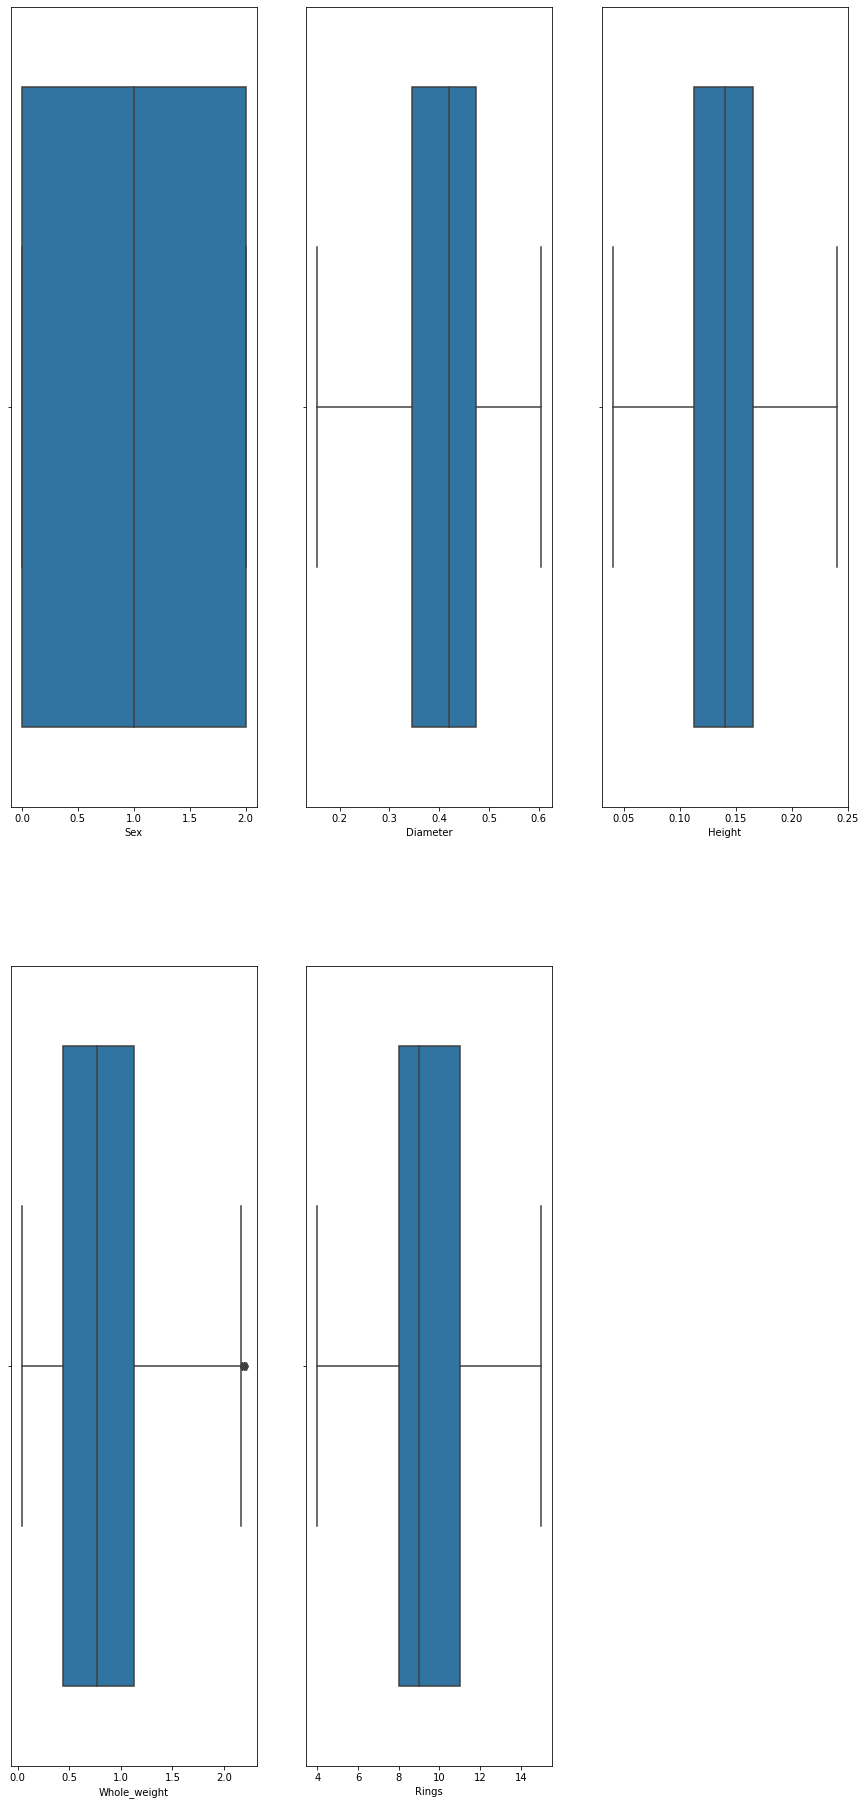

In [28]:
# Checking outliers
plt.figure(figsize=(15,50))
graph = 1
for column in data:
    if graph<=9:
        ax = plt.subplot(3,3,graph)
        sns.boxplot(data[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

The outliers are removed

## Model building

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
x = data.drop(columns = ['Rings'])
y = data['Rings']

### Visulaising relationship between dependent and independent variables

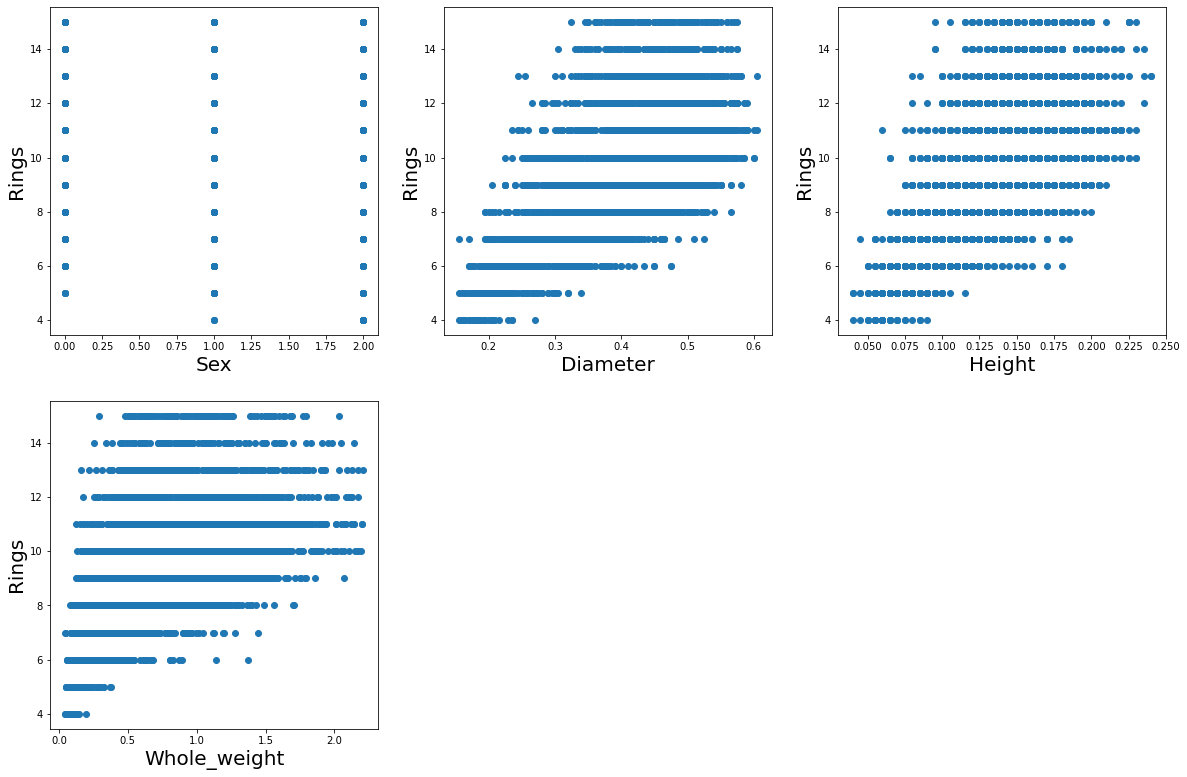

In [31]:
plt.figure(figsize = (20,35), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Rings', fontsize = 20)
    plotnumber+=1
plt.show()

The relationship between feature and label looks fairly linear

In [32]:
# Train and test the data
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.25, random_state = 10)

# Instantiate and train the model
regression = LinearRegression()
regression.fit (x_train, y_train)

LinearRegression()

#### Training score

In [33]:
regression.score(x_train, y_train)

0.4113551044245255

#### Testing score

In [34]:
regression.score(x_test,y_test)

0.4373753655207242

Since the accuracy is low, hyperparameter tuning is done

### Hyper parameter tuning using Randomised search CV

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
dt = DecisionTreeRegressor()

In [37]:
params = {'n_estimators': [40,47,49,50], 'learning_rate':[0.30,0.40,0.45]} 
rnd_search = RandomizedSearchCV (AdaBoostRegressor(), cv = 5, param_distributions = params)

In [38]:
rnd_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [39]:
rnd_search.best_estimator_

AdaBoostRegressor(learning_rate=0.45, n_estimators=47)

In [40]:
from sklearn import metrics

In [42]:
ada = AdaBoostRegressor(base_estimator = dt, learning_rate=0.45,n_estimators=47)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

print('****Accuracy post tuning****')
print(metrics.r2_score(y_test,y_pred))

****Accuracy post tuning****
0.24200596947254083


## Save the model

In [43]:
import pickle

In [44]:
#Save the model to the local filesystem
Abalone = 'abalone_model.pickle'
pickle.dump(regression, open (Abalone, 'wb'))

#### Plot and visualise

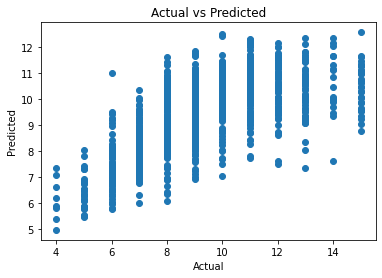

In [45]:
y_pred = regression.predict (x_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel ('Predicted')
plt.title ('Actual vs Predicted')
plt.show()